Adult Income Dataset:
Applying Cross-Validation to Random Forest Classifier

In [2]:
import pandas as pd
data=pd.read_csv('adult.csv')

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']

In [6]:
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [7]:
X = data.drop('income', axis=1)
y = data['income']

In [8]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
X_subset, _, y_subset, _ = train_test_split(X, y, test_size=0.8, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [11]:
cv_scores = cross_val_score(rf_classifier, X_subset, y_subset, cv=kf)

In [12]:
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

In [13]:
print("Cross-Validation Scores: ", cv_scores)
print("Mean CV Score: ", cv_mean)
print("Standard Deviation of CV Score: ", cv_std)

Cross-Validation Scores:  [0.84902764 0.85209826 0.85465711 0.84587814 0.85867896]
Mean CV Score:  0.8520680201731479
Standard Deviation of CV Score:  0.004426451996596107


Investigating Overfitting and Underfitting in Gradient Boosting Machines

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
estimators = [50, 100, 150, 200]
learning_rates = [0.01, 0.1, 0.2, 0.3]
training_scores = []
validation_scores = []

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
for n_estimators in estimators:
    for learning_rate in learning_rates:
        gb_classifier = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=42)
        gb_classifier.fit(X_train, y_train)
        y_train_pred = gb_classifier.predict(X_train)
        y_val_pred = gb_classifier.predict(X_val)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)
        training_scores.append((n_estimators, learning_rate, train_accuracy))
        validation_scores.append((n_estimators, learning_rate, val_accuracy))

In [17]:
training_scores_df = pd.DataFrame(training_scores, columns=['n_estimators', 'learning_rate', 'accuracy'])
validation_scores_df = pd.DataFrame(validation_scores, columns=['n_estimators', 'learning_rate', 'accuracy'])

In [18]:
print("Training Scores:\n", training_scores_df)
print("\nValidation Scores:\n", validation_scores_df)

Training Scores:
     n_estimators  learning_rate  accuracy
0             50           0.01  0.802856
1             50           0.10  0.859775
2             50           0.20  0.866711
3             50           0.30  0.872495
4            100           0.01  0.840580
5            100           0.10  0.867197
6            100           0.20  0.874850
7            100           0.30  0.878970
8            150           0.01  0.846262
9            150           0.10  0.872546
10           150           0.20  0.878535
11           150           0.30  0.882784
12           200           0.01  0.847747
13           200           0.10  0.874619
14           200           0.20  0.881478
15           200           0.30  0.885983

Validation Scores:
     n_estimators  learning_rate  accuracy
0             50           0.01  0.810114
1             50           0.10  0.864572
2             50           0.20  0.871328
3             50           0.30  0.876548
4            100           0.01  0.84

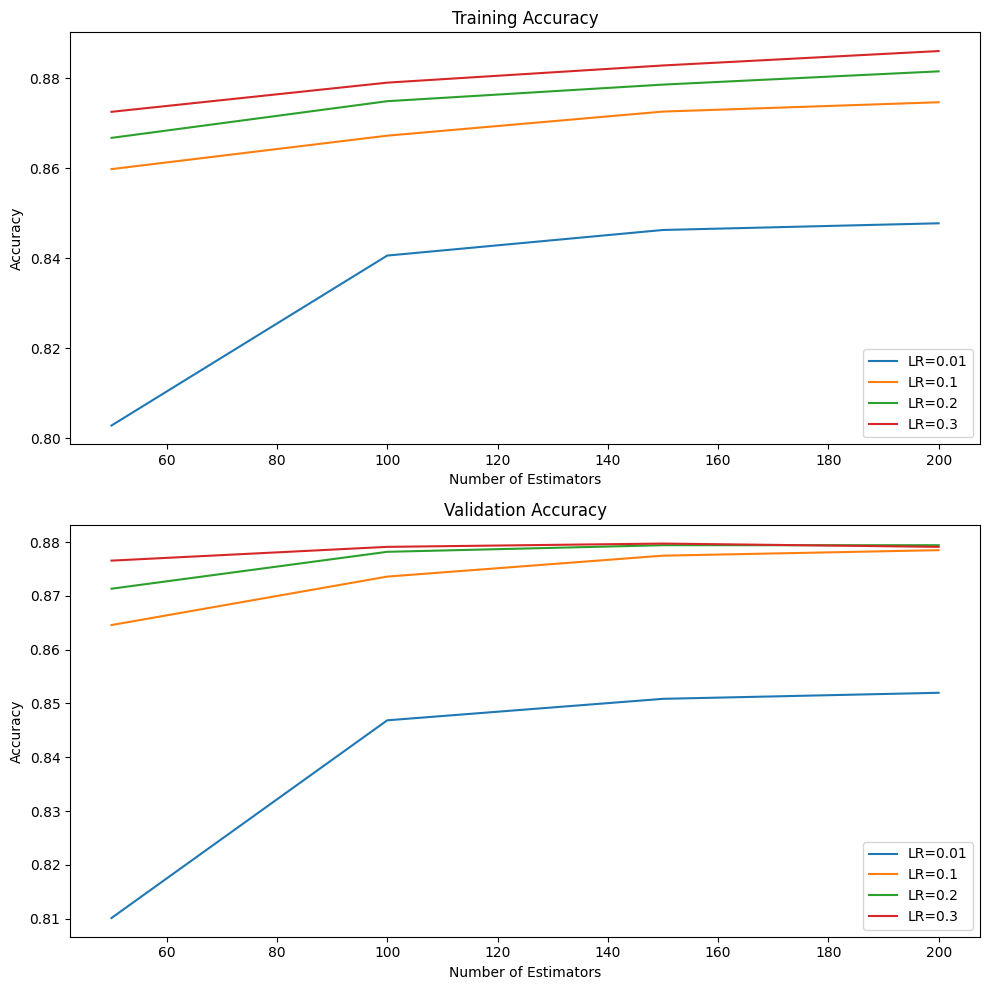

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
for learning_rate in learning_rates:
    subset = training_scores_df[training_scores_df['learning_rate'] == learning_rate]
    axes[0].plot(subset['n_estimators'], subset['accuracy'], label=f'LR={learning_rate}')
axes[0].set_title('Training Accuracy')
axes[0].set_xlabel('Number of Estimators')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
for learning_rate in learning_rates:
    subset = validation_scores_df[validation_scores_df['learning_rate'] == learning_rate]
    axes[1].plot(subset['n_estimators'], subset['accuracy'], label=f'LR={learning_rate}')
axes[1].set_title('Validation Accuracy')
axes[1].set_xlabel('Number of Estimators')
axes[1].set_ylabel('Accuracy')
axes[1].legend()
plt.tight_layout()
plt.show()

Evaluating Precision, Recall, and F1-Score for Random Forests

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_val_pred = rf_classifier.predict(X_val)
precision = precision_score(y_val, y_val_pred, average='binary')
recall = recall_score(y_val, y_val_pred, average='binary')
f1 = f1_score(y_val, y_val_pred, average='binary')
report = classification_report(y_val, y_val_pred)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)
print("\nClassification Report:\n", report)

Precision:  0.7423096318709027
Recall:  0.6427947598253275
F1-score:  0.6889772993213199

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.64      0.69      2290

    accuracy                           0.86      9769
   macro avg       0.82      0.79      0.80      9769
weighted avg       0.86      0.86      0.86      9769



ROC Curve and AUC for Gradient Boosting Classifier

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

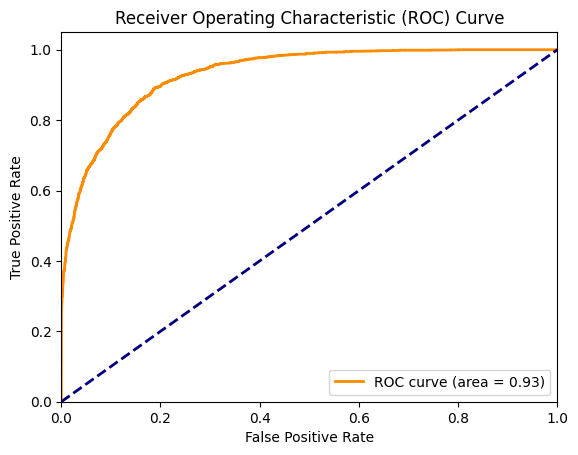

AUC:  0.9312855033394816


In [24]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
print("AUC: ", roc_auc)

Model Performance Comparison with Different Metrics

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': Pipeline([('scaler', StandardScaler()), ('svc', SVC(probability=True, random_state=42))])
}

In [26]:
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
kf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

In [29]:
cv_results = {classifier: {} for classifier in classifiers}

In [30]:
for name, clf in classifiers.items():
    for metric, scorer in scoring.items():
        scores = cross_val_score(clf, X, y, cv=kf, scoring=scorer)
        cv_results[name][metric] = {
            'mean': scores.mean(),
            'std': scores.std()
        }

In [31]:
results_df = pd.DataFrame(cv_results).T

In [32]:
print(results_df)

                                                            accuracy  \
Random Forest      {'mean': 0.8554522746816264, 'std': 0.00163793...   
Gradient Boosting  {'mean': 0.864686130789075, 'std': 0.000511854...   
SVM                {'mean': 0.8482453625977642, 'std': 0.00053232...   

                                                           precision  \
Random Forest      {'mean': 0.7390331855050067, 'std': 0.00761392...   
Gradient Boosting  {'mean': 0.7898851624877594, 'std': 0.01120025...   
SVM                {'mean': 0.7527504692243163, 'std': 0.00759811...   

                                                              recall  \
Random Forest      {'mean': 0.6122189213462982, 'std': 0.00253377...   
Gradient Boosting  {'mean': 0.5924541384807551, 'std': 0.01151642...   
SVM                {'mean': 0.5449651314108636, 'std': 0.00749079...   

                                                                  f1  \
Random Forest      {'mean': 0.6696407211266721, 'std': 0.0016

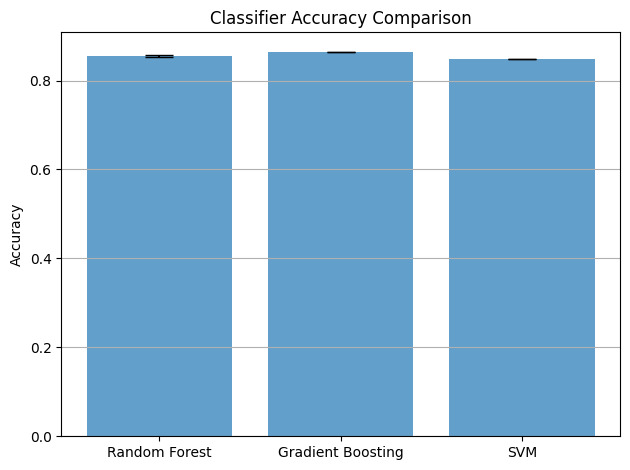

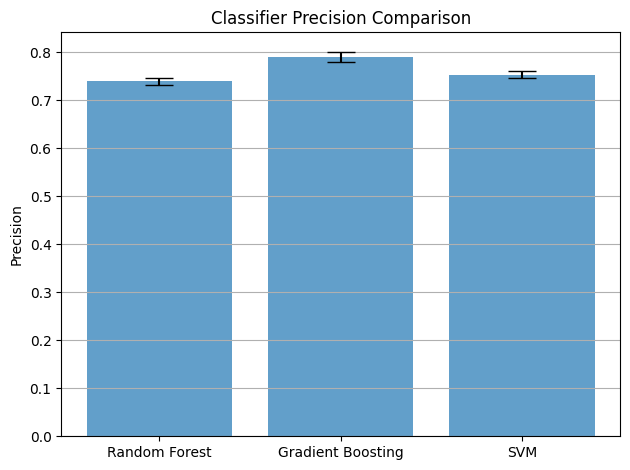

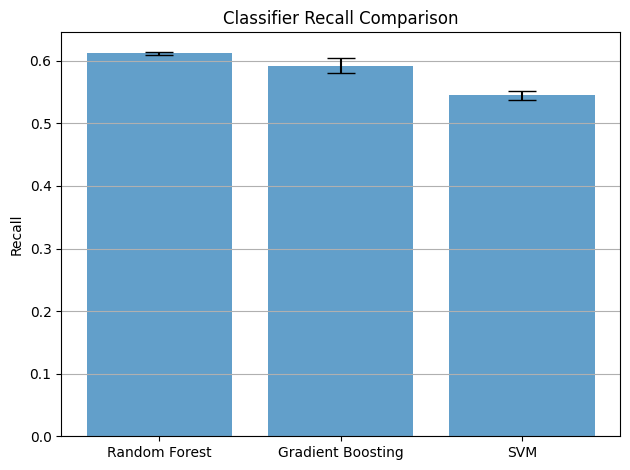

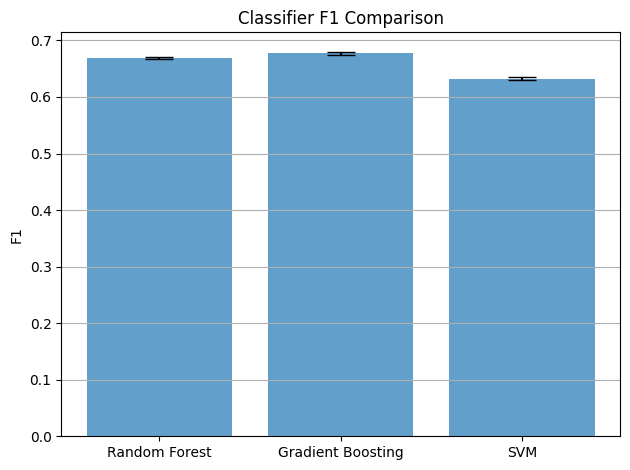

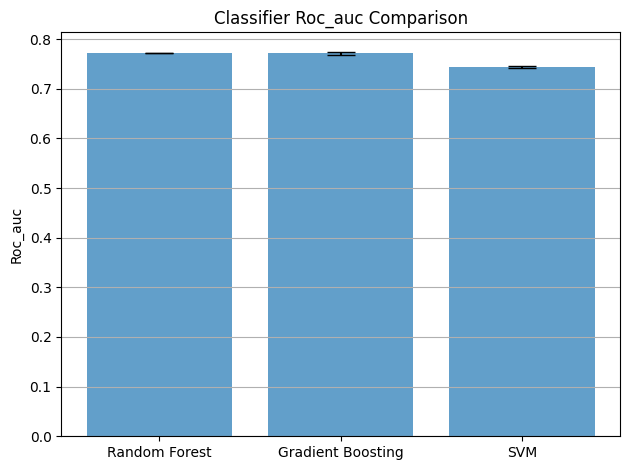

In [38]:
import numpy as np
def plot_results(results, metric):
    means = [results[clf][metric]['mean'] for clf in results]
    stds = [results[clf][metric]['std'] for clf in results]
    labels = list(results.keys())
    x_pos = np.arange(len(labels))
    fig, ax = plt.subplots()
    ax.bar(x_pos, means, yerr=stds, alpha=0.7, align='center', capsize=10)
    ax.set_ylabel(metric.capitalize())
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title(f'Classifier {metric.capitalize()} Comparison')
    ax.yaxis.grid(True)
    plt.tight_layout()
    plt.show()
for metric in scoring.keys():
    plot_results(cv_results, metric)